# pandas --> series类型/DataFrame类型

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Series

本身有索引的一维数组

### 直接创建

In [3]:
#  创建series
ser1 = pd.Series(np.random.randint(100,500,4),index=[f'{x}季度' for x in '一二三四'])

In [4]:
ser1

一季度    253
二季度    262
三季度    292
四季度    211
dtype: int32

### 使用字典创建Series数据类型

In [5]:
ser2 = pd.Series(data={
    '一季度':520,
    '二季度':430,
    '三季度':660,
    '四季度':100
})

In [6]:
ser2

一季度    520
二季度    430
三季度    660
四季度    100
dtype: int64

In [7]:
#配置字体参数雅黑
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
#安装字体
plt.rcParams['font.sans-serif'] = 'SimHei'
#配置矢量图
%config InlineBackend.figure_format = 'svg'

<Axes: >

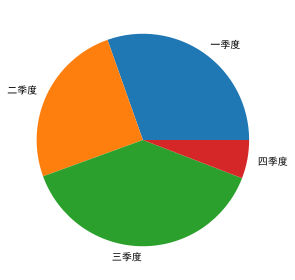

In [8]:
ser2.plot(kind='pie')

<Axes: >

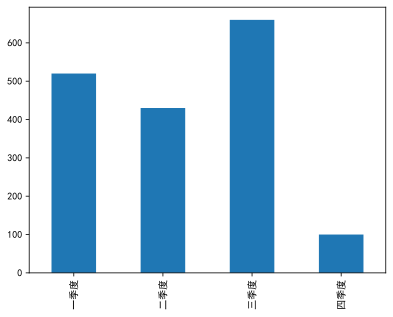

In [9]:
ser2.plot(kind='bar')

### Series数据类型的描述性统计数据

中位数

In [10]:
ser2.median()

475.0

描述

In [11]:
ser2.describe()    #ser3 = ser2.describe()

count      4.000000
mean     427.500000
std      237.960081
min      100.000000
25%      347.500000
50%      475.000000
75%      555.000000
max      660.000000
dtype: float64

### 对数据的观察

查看数据索引

In [12]:
ser2.index

Index(['一季度', '二季度', '三季度', '四季度'], dtype='object')

查看值

In [13]:
ser2.values

array([520, 430, 660, 100], dtype=int64)

查看大小

In [14]:
ser2.size

4

查看数据是否有空值

In [15]:
ser2.hasnans

False

### Series的索引

#### 数据切片

In [16]:
ser2

一季度    520
二季度    430
三季度    660
四季度    100
dtype: int64

In [17]:
ser2[1:3]

二季度    430
三季度    660
dtype: int64

In [18]:
ser2['二季度':'三季度']

二季度    430
三季度    660
dtype: int64

In [19]:
ser2[ser2>400]

一季度    520
二季度    430
三季度    660
dtype: int64

### 空值的处理

In [23]:
ser2 = pd.Series(data={
    '一季度':520,
    '二季度':430,
    '三季度':np.NAN,
    '四季度':100
})

#### 1. 删除空值

数据是否有意义？
空值的量级？（比率很小，对整体数据没多大影响）


In [21]:
ser2.hasnans

True

In [22]:
ser2.dropna(inplace = True)

In [24]:
ser2

一季度    520.0
二季度    430.0
四季度    100.0
dtype: float64

#### 2.空值填充

查看空值

In [30]:
ser2[ser2.isnull()]     #布尔索引 提取空值
# ser2[ser2.notnull()]

三季度   NaN
dtype: float64

（1）根据统计学依据

In [24]:
# 数据连续的情况下
# 前面的值填充
ser2.fillna(method='ffill')

一季度    520.0
二季度    430.0
三季度    430.0
四季度    100.0
dtype: float64

In [25]:
# 后面的值填充
ser2.fillna(method='bfill')

一季度    520.0
二季度    430.0
三季度    100.0
四季度    100.0
dtype: float64

In [27]:
# 用描述性统计信息
# 平均值
ser2.fillna(ser2.mean())

一季度    520.0
二季度    430.0
三季度    350.0
四季度    100.0
dtype: float64

In [28]:
# 中位数
ser2.fillna(ser2.median())

一季度    520.0
二季度    430.0
三季度    430.0
四季度    100.0
dtype: float64

In [29]:
# 直接填充
ser2.fillna(200)

一季度    520.0
二季度    430.0
三季度    200.0
四季度    100.0
dtype: float64

## 2.DataFrame 数据表

### （1）创建DataFrame数据

① 直接创建

② 使用字典的方式创建

In [31]:
data_dict = {
    '语文':[43,56,76,80,90],
    '数学':[99,56,65,33,44],
    '英语':[45,57,67,87,98]
}

In [32]:
students_id = np.arange(1001,1006)

In [33]:
df1 = pd.DataFrame(data=data_dict,index=students_id)

In [34]:
df1

,语文,数学,英语
1001,43,99,45
1002,56,56,57
1003,76,65,67
1004,80,33,87
1005,90,44,98


③ 读取csv文件

默认创建索引

In [35]:
df = pd.read_csv('./2018年北京积分落户数据.csv')

In [36]:
df

,id,name,birthday,company,score
0,1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
1,2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
2,3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
3,4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
4,5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79
...,...,...,...,...,...
6014,6015,孙宏波,1978-08,华为海洋网络有限公司北京科技分公司,90.75
6015,6016,刘丽香,1976-11,福斯（上海）流体设备有限公司北京分公司,90.75
6016,6017,周崧,1977-10,赢创德固赛（中国）投资有限公司,90.75
6017,6018,赵妍,1979-07,澳科利耳医疗器械（北京）有限公司,90.75


In [37]:
df = pd.read_csv('./2018年北京积分落户数据.csv',index_col='id')

In [38]:
df

,name,birthday,company,score
id,,,,
1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79
...,...,...,...,...
6015,孙宏波,1978-08,华为海洋网络有限公司北京科技分公司,90.75
6016,刘丽香,1976-11,福斯（上海）流体设备有限公司北京分公司,90.75
6017,周崧,1977-10,赢创德固赛（中国）投资有限公司,90.75


In [39]:
df = pd.read_csv('./2018年北京积分落户数据.csv',index_col='id',usecols=['id','name','score'])   #取哪几列

In [40]:
df

,name,score
id,,
1,杨效丰,122.59
2,纪丰伟,121.25
3,王永,118.96
4,杨静,118.21
5,张凯江,117.79
...,...,...
6015,孙宏波,90.75
6016,刘丽香,90.75
6017,周崧,90.75


In [42]:
df = pd.read_csv('./2018年北京积分落户数据.csv',index_col='id',usecols=['id','name','score'],nrows=100)  #取多少行

In [43]:
df

,name,score
id,,
1,杨效丰,122.59
2,纪丰伟,121.25
3,王永,118.96
4,杨静,118.21
5,张凯江,117.79
...,...,...
96,郭学文,108.17
97,张崙,108.17
98,沈桂芳,108.16


### 通过接口访问网页数据

In [44]:
import pandas_datareader as pdr
import pandas_datareader.data as web

In [45]:
df2 = web.DataReader('BABA','stooq')

In [46]:
df2

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-17,101.00,101.09,99.25,100.01,18121644
2023-02-16,102.71,104.52,102.03,103.11,21747094
2023-02-15,102.39,103.44,102.00,103.08,18910236
2023-02-14,103.55,104.48,101.85,104.22,12978395
2023-02-13,105.99,106.35,104.15,104.79,17577825
...,...,...,...,...,...
2018-02-26,194.46,195.15,190.65,194.19,19444679
2018-02-23,190.18,193.40,189.95,193.29,16926868
2018-02-22,190.20,190.74,187.77,188.75,12269486


<Axes: xlabel='Date'>

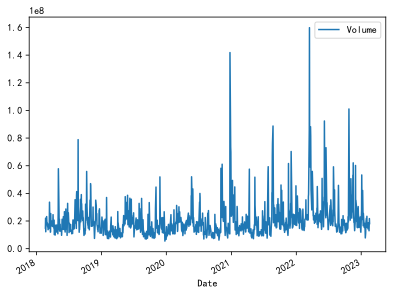

In [47]:
df2.plot(kind='line',y='Volume')

### (2) 基础方法

观察数据情况

In [48]:
df2

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-17,101.00,101.09,99.25,100.01,18121644
2023-02-16,102.71,104.52,102.03,103.11,21747094
2023-02-15,102.39,103.44,102.00,103.08,18910236
2023-02-14,103.55,104.48,101.85,104.22,12978395
2023-02-13,105.99,106.35,104.15,104.79,17577825
...,...,...,...,...,...
2018-02-26,194.46,195.15,190.65,194.19,19444679
2018-02-23,190.18,193.40,189.95,193.29,16926868
2018-02-22,190.20,190.74,187.77,188.75,12269486


In [49]:
# 先取前10行数据
df2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-17,101.00,101.09,99.25,100.01,18121644
2023-02-16,102.71,104.52,102.03,103.11,21747094
2023-02-15,102.39,103.44,102.00,103.08,18910236
2023-02-14,103.55,104.48,101.85,104.22,12978395
2023-02-13,105.99,106.35,104.15,104.79,17577825


In [51]:
df2.tail(10)  #不给参数默认5

,Open,High,Low,Close,Volume
Date,,,,,
2018-03-05,179.41,181.950,177.07,181.60,15656661
2018-03-02,178.01,180.230,175.45,179.76,18909073
2018-03-01,186.18,187.480,180.05,181.99,17286309
2018-02-28,187.25,188.240,185.00,186.14,19367576
2018-02-27,192.59,193.567,187.21,188.26,23218450
2018-02-26,194.46,195.150,190.65,194.19,19444679
2018-02-23,190.18,193.400,189.95,193.29,16926868
2018-02-22,190.20,190.740,187.77,188.75,12269486
2018-02-21,189.37,193.170,188.46,188.82,22048610


 info()方法

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2023-02-17 to 2018-02-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


describe()方法

In [53]:
df2.describe()

,Open,High,Low,Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,175.418068,177.664295,172.796884,175.254361,2.036960e+07
std,55.495415,55.716552,55.045698,55.442776,1.270820e+07
min,63.200000,64.100000,58.010000,63.150000,5.522987e+06
25%,135.365000,137.752000,132.135000,136.425000,1.336458e+07
50%,177.580000,179.240000,175.336000,177.190000,1.747066e+07
75%,211.195000,213.695000,209.366650,211.480000,2.305818e+07
max,313.500000,319.320000,308.910000,317.140000,1.598343e+08


### 数据的转换

In [54]:
df = pd.read_csv('./2018年北京积分落户数据.csv',index_col='id')

In [55]:
df

,name,birthday,company,score
id,,,,
1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79
...,...,...,...,...
6015,孙宏波,1978-08,华为海洋网络有限公司北京科技分公司,90.75
6016,刘丽香,1976-11,福斯（上海）流体设备有限公司北京分公司,90.75
6017,周崧,1977-10,赢创德固赛（中国）投资有限公司,90.75


#### 删除行

In [56]:
df.drop(index=3)    #df.drop(index=3,inplace=True)

,name,birthday,company,score
id,,,,
1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79
6,罗恒,1974-01,艾美仕市场调研咨询（上海）有限公司北京分公司,117.34
...,...,...,...,...
6015,孙宏波,1978-08,华为海洋网络有限公司北京科技分公司,90.75
6016,刘丽香,1976-11,福斯（上海）流体设备有限公司北京分公司,90.75
6017,周崧,1977-10,赢创德固赛（中国）投资有限公司,90.75


#### 删除列

In [57]:
df.drop(columns='company')

,name,birthday,score
id,,,
1,杨效丰,1972-12,122.59
2,纪丰伟,1974-12,121.25
3,王永,1974-05,118.96
4,杨静,1975-07,118.21
5,张凯江,1974-11,117.79
...,...,...,...
6015,孙宏波,1978-08,90.75
6016,刘丽香,1976-11,90.75
6017,周崧,1977-10,90.75


#### 添加列

In [58]:
df['绩优股'] = '是'

In [59]:
df

,name,birthday,company,score,绩优股
id,,,,,
1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59,是
2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25,是
3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96,是
4,杨静,1975-07,中科专利商标代理有限责任公司,118.21,是
5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79,是
...,...,...,...,...,...
6015,孙宏波,1978-08,华为海洋网络有限公司北京科技分公司,90.75,是
6016,刘丽香,1976-11,福斯（上海）流体设备有限公司北京分公司,90.75,是
6017,周崧,1977-10,赢创德固赛（中国）投资有限公司,90.75,是


#### 加入行

In [60]:
df.loc[6020] = {'name':'鹅妈妈','birthday':'1998-10','company':'CDU','score':1,'绩优股':'是'}

In [61]:
df

,name,birthday,company,score,绩优股
id,,,,,
1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59,是
2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25,是
3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96,是
4,杨静,1975-07,中科专利商标代理有限责任公司,118.21,是
5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79,是
...,...,...,...,...,...
6016,刘丽香,1976-11,福斯（上海）流体设备有限公司北京分公司,90.75,是
6017,周崧,1977-10,赢创德固赛（中国）投资有限公司,90.75,是
6018,赵妍,1979-07,澳科利耳医疗器械（北京）有限公司,90.75,是


#### 随机取样

In [62]:
df.sample(10)

,name,birthday,company,score,绩优股
id,,,,,
3800,位淑萍,1974-10,北京庆东纳碧安热能设备有限公司,93.25,是
3935,赵玉兰,1975-10,瑞萨电子（中国）有限公司,93.05,是
4822,马永征,1979-08,中国食品杂志社,92.00,是
1372,占德权,1979-06,丹佛斯（天津）有限公司北京分公司,98.16,是
2032,毕鹏辉,1973-11,泰尔文特控制系统（中国）有限公司,96.25,是
3084,刘新彩,1976-07,北京京林创新园艺科技有限公司,94.33,是
3930,刘金梅,1972-10,中交一公局第一工程有限公司,93.05,是
4468,张利鹏,1976-08,中国国际人才开发中心第二人力资源部,92.38,是
1499,田晓斌,1974-10,北京罗顿沙河建设发展有限公司,97.75,是
